### Apply FaceNet to General Image
#### Boris & Igor
Dec, 2018

In [1]:
import sys
import os
import os.path
import time
import cv2
import numpy as np
import imports
from featurenet import *
from fr_utils import load_weights_from_FaceNet, img_to_encoding
from utils import *
from inception_blocks_v2 import faceRecoModel
from keras.models import load_model

from IPython.display import Image
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

np.set_printoptions(threshold=np.nan)

Using TensorFlow backend.


Feature {feature_file}


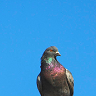

In [13]:
model_file = r'.\model\model.h5'
root_folder = r'.\data\pegeons'
full_image_file = os.path.join(root_folder, 'pegeons.png')
feature_file = os.path.join(root_folder, 'single_pegeon_small.png')
print("Feature {feature_file}")
Image(filename=feature_file)


Image file .\data\pegeons\pegeons.png


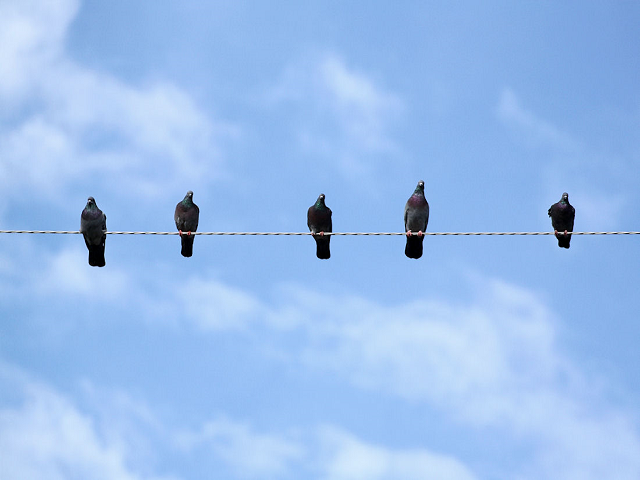

In [3]:
print(f"Image file {full_image_file}")
Image(filename=full_image_file)

In [16]:
# 
# Demo: how to cut small images from big image
# 
cut_images_folder = os.path.join(root_folder, "cut_images")
image_step = 20
cut_images(full_image_file, model_width, model_height, image_step, cut_images_folder)

In [5]:
# 
# load model
# 
FRmodel = load_feature_model(model_file)

model loaded in 6.074439764022827 seconds
Total Params: 3743280


In [14]:
feature_encoding = img_to_encoding(feature_file, FRmodel)

In [7]:
# 
# Demo: Calculate score for test images
# 
test_images_folder = cut_images_folder
test_images_files = get_files_from_folder(test_images_folder)
all_scores = calculate_score_for_images(FRmodel, feature_encoding, test_images_folder, True)
print(len(all_scores))

found 560 files in folder .\data\pegeons\cut_images
database:
{'feature': array([[ 0.07729109,  0.09345852,  0.11267534, -0.02678388,  0.1303395 ,
         0.20171447,  0.07956658,  0.03928788, -0.11770001,  0.00477366,
        -0.01118057,  0.05891392,  0.06875129, -0.03345352,  0.07162147,
        -0.01054906, -0.01202491,  0.01665233, -0.10896125,  0.1456035 ,
         0.09009767,  0.05165759, -0.0129493 ,  0.13818067, -0.05524993,
        -0.06423634, -0.16683291, -0.05595438,  0.09335891,  0.04067839,
        -0.09243101, -0.02846224, -0.08458864,  0.06046456,  0.02088097,
         0.04065148,  0.02795236,  0.07202256, -0.0666614 , -0.02257626,
         0.07248617,  0.04739303, -0.00618575, -0.13130477, -0.13528895,
         0.04464575,  0.1216906 , -0.01620644, -0.17366853,  0.0685886 ,
         0.01047082, -0.05643129, -0.05605779,  0.06973481,  0.16399397,
         0.0150517 , -0.04970472,  0.11061062, -0.07381662, -0.0757332 ,
        -0.0676888 ,  0.10164731,  0.10015203, -0.

In [17]:
img_feature = mpimg.imread(feature_file)
img_full = mpimg.imread(full_image_file)
w = 96
h = 96
def pictures(idx):
    image_file = all_scores[idx][0]
    
    file_name = image_file.split(".")[0]
    items = file_name.split("_")
    x = int(items[1])
    y = int(items[2])
    
    pt1 = (x, y)
    pt2 = (x+w, y+h)
    radius = 50
    color = (127,255,0)
    idx_image = img_full.copy()
    cv2.rectangle(idx_image, pt1, pt2, color, thickness=5, lineType=8, shift=0)    
    print('The score of the {} is {}'.format(image_file, all_scores[idx][1]))
    f, axarr = plt.subplots(1, 2, sharey=True)
    img = mpimg.imread(os.path.join(test_images_folder, image_file))
    axarr[0].imshow(img_feature)
    axarr[1].imshow(img)
    plt.show()
    
    f, axarr = plt.subplots(1, 1, sharey=True)    
    axarr.imshow(idx_image)
    plt.show()

In [18]:
sorted_scores = all_scores
sorted_scores.sort(key=lambda tup: tup[1])
print(f"number of scores: {len(sorted_scores)}")
interact(pictures, idx=(1,len(sorted_scores),1));

number of scores: 561


interactive(children=(IntSlider(value=281, description='idx', max=561, min=1), Output()), _dom_classes=('widge…